In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nonlinear_LS import *

In [2]:
# il modello vero:
xmax = 1.0
dx = 0.1
x = np.array(np.arange(0.0,xmax+dx,dx))
N = len(x)
theta = np.array([-2.0, np.sqrt(2.)])
n_theta = len(theta)

def y_param(theta):
    global x
    return y(x,theta)

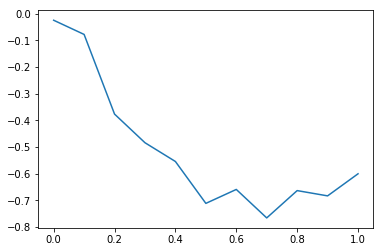

In [15]:
esempio = 31
if esempio < 20:
    # con questo esempio si vede il problema della simmetria sul secondo parametro: 
    # "esempio 10": partendo da theta[1]=0.0 la colonna di psi diventa nulla: GN e LM non proseguono.
    # "esempio 11": mettendo "std_mod > 0.0" psi diventa nonsingolare grazie al rumore (!); 
    #             
    # "esempio 15": partendo da np.random.randn(n_theta) si elude la simmetria
    #               e l'algoritmo converge molto prima!
    y = lambda x,theta: theta[0]*(x+std_mod*np.random.randn(N)) + (theta[1]*(x+std_mod*np.random.randn(N)))**2
elif esempio < 30:
    # con questo esempio si vede un problema malcondizionato:
    # "esempio 20": dove GN funziona con stime assurde
    # "esempio 22": GN con std_mis = 0.05
    # "esempio 23": LM con std_mis = 0.05
    y = lambda x,theta: theta[0]*(x+std_mod*np.random.randn(N))**2 + theta[1]*(x+std_mod*np.random.randn(N))**2
elif esempio > 30:
    # problema bencondizionato per confronto con l'esempio 23: LM interviene molto meno.
    # "esempio 31": LM con std_mis = 0.05
    # "esempio 32": LM con std_mis = 0.2 ha grande errore nei residui
    #               ma piccolo nella stima dei parametri perchè il modello è buono!
    y = lambda x,theta: theta[0]*(x+std_mod*np.random.randn(N)) + theta[1]*(x+std_mod*np.random.randn(N))**2
else:
    print("esempio indefinito!")
#endif
if esempio == 11 or esempio == 12:
    std_mod = 0.001  # deviazione standard dell'errore di modello
else:
    std_mod = 0.0  # deviazione standard dell'errore di modello
#endif
if esempio == 22 or esempio == 23 or esempio == 31:
    std_mis = 0.05
elif esempio == 32:
    std_mis = 0.2
else:
    std_mis = 0.0  # deviazione standard dell'errore di misuray_meas = y(x,theta) + std_mis*randn(N) 
#endif
y_meas = y(x,theta) + std_mis*np.random.randn(N) # i dati misurati, ottenuti cioe' con i valori veri dei parametri (situazione idealizzata)
plt.figure(1); plt.plot(x,y_meas); plt.show()

*******************************************************
metodo_stima =  GN


opzione_solve =  LS
-------------------------------------------------------
start:  theta_est =  [0. 0.] FN =  0.3166475595389057
psi_r.shape =  (11, 2)
valori singolari di psi_r =  [2.50748113 0.30957771]
mu =  1.0 temp_FN =  0.0021413067722137365
delta_theta_GN =  [-2.00887775  1.40545419]
fine di iterazione  1 :  theta_est =  [-2.00887775  1.40545419]    FN =  0.0021413067722137365 
-----------------------------------------------------------
psi_r.shape =  (11, 2)
valori singolari di psi_r =  [2.50748113 0.30957771]
mu =  1.0 temp_FN =  0.00214130677221374
mu =  0.5 temp_FN =  0.0021413067722137404
mu =  0.25 temp_FN =  0.0021413067722137404
mu =  0.125 temp_FN =  0.0021413067722137365
mu =  0.0625 temp_FN =  0.0021413067722137365
mu =  0.03125 temp_FN =  0.0021413067722137365
mu =  0.015625 temp_FN =  0.0021413067722137365
mu =  0.0078125 temp_FN =  0.0021413067722137365
mu =  0.00390625 temp_FN =  0.00214

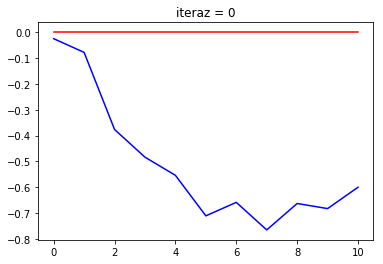

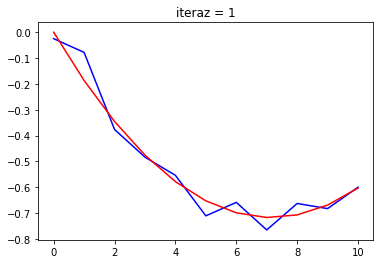

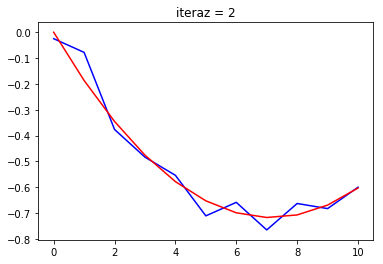

In [16]:
# stime iniziali dei parametri:
if esempio == 15:
    theta_est = np.random.randn(n_theta)  
else:
    theta_est = np.array([0., 0.])  # NB: provare con "theta_est = np.array([0., 0.])": per simmetria non stima il secondo parametro (la seconda colonna di psi risulta nulla) !
#endif
h_theta = np.array([0.2, 0.2])  # provare con [0.2, 0.2]: talvolta GN non converge!
# metodo_stima: 'GN'=line-search (Gauss-Newton), 'LM'=trust-region (Levenberg-Marquardt)
# opzione_solve: 0=LS, 1=TLS, 2=TSVD1
if esempio == 12 or esempio == 21 or esempio == 23:
    GN_LM(y_meas,y_param,theta_est,h_theta=h_theta,metodo_stima='LM',analisi = True)  #,metodo_stima = 'GN',LM_semplificato = True,opzione_solve = 0,analisi = True)
else:
    GN_LM(y_meas,y_param,theta_est,h_theta=h_theta,metodo_stima='GN',analisi = True)  #,metodo_stima = 'GN',LM_semplificato = True,opzione_solve = 0,analisi = True)
#endif
plt.show()